# Bayesian A-B testing of online conversion data
## (...or, any random process where counting is involved)
Suppose you are selling something online.  You are testing a new webpage design to see if it results in more sales ("conversions" of web page visitors to customers).  You divert a portion of your customers to the new website, at random (say, 10% of them).

Easiet way to install pymc: `conda install pymc` from your Anaconda directory (Windows)

Book: [Bayesian Methods for Hackers by Davidson-Pilon](https://www.amazon.com/Bayesian-Methods-Hackers-Probabilistic-Addison-Wesley/dp/0133902838/ref=sr_1_1?ie=UTF8&qid=1470965242&sr=8-1&keywords=bayesian+methods+hackers)

There is also a [free Jupyter notebook version of the book on GitHub!](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

In [1]:
import pymc
import pandas as pd
import numpy as np
%matplotlib inline

Generate simulated data for purposes of demonstrating the A-B testing technique. 

In [21]:
conv_rate_a = 0.06
conv_rate_b = 0.07
data_a = pymc.rbernoulli(conv_rate_a, 1800)
data_b = pymc.rbernoulli(conv_rate_b, 100)

In [22]:
print data_a[:30]
print len(data_a)

[False False False  True False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False]
1800


In [23]:
pd.Series(data_a).sum()

105

In [24]:
pd.Series(data_b).sum()

3

Set up the test apparatus.

In [25]:
p_a = pymc.Uniform("p_a", 0, 1)
p_b = pymc.Uniform("p_b", 0, 1)

@pymc.deterministic
def delta(first = p_a, second = p_b):
    answer = second - first
    return answer

observed_a = pymc.Bernoulli("obs_a", p_a, value=data_a, observed=True)
observed_b = pymc.Bernoulli("obs_b", p_b, value=data_b, observed=True)

Run the simulation to determine the most likely parameter values.

In [26]:
model = pymc.MCMC([p_a, p_b, delta, observed_a, observed_b])

In [27]:
model.sample(100000,10000,100)

 [-----------------100%-----------------] 100000 of 100000 complete in 7.2 sec

Plotting p_a
Plotting p_b
Plotting delta


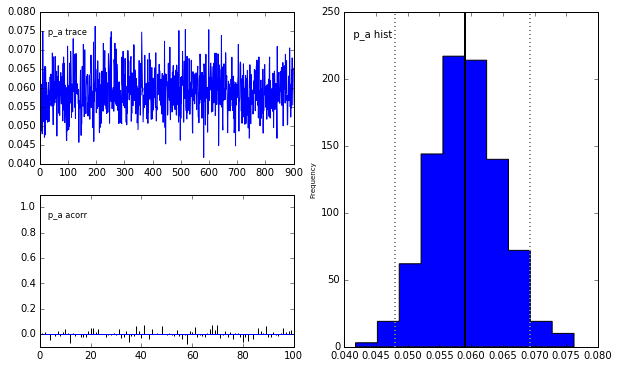

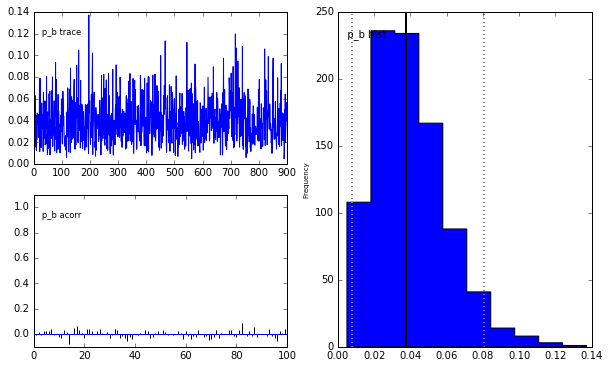

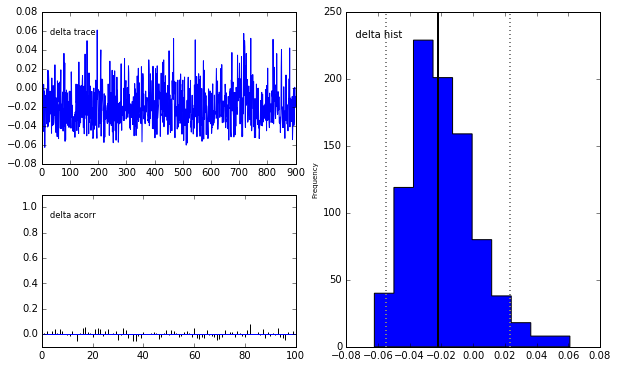

In [28]:
pymc.Matplot.plot(model)